In [8]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Conspecific_Tracking_ta_edit_117 as cs
from datetime import datetime
from scipy import interpolate 
from scipy import misc
from beating import rotation
from beating import tail_spline
from functions import *
from hmmlearn import hmm
from auto_filter_full import  auto_scoring_tracefilter_full, transform_data
from functools import partial
from find_features import Feature_extraction
plt.rcParams["axes.grid"] = False
import seaborn as sn
import ssm
from functions_clustering import *

period = range(90000,150000)

Load Data

In [9]:
path = "h5_2/IM1_IM2_2.1.1_LDLC_resnet50_DLC_toptrackFeb27shuffle1_170000.h5"
f = pd.HDFStore(path,'r')
df = f.get('df_with_missing')
df.columns = df.columns.droplevel()

Filter df(Yuyang's method, with 2 more columns used)

In [3]:
new_features=Feature_extraction(starttime=0,endtime=216062)
filtered_df=new_features.filter_df(df,add_midpoint=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/miaoyuqi/研究/Statistical analyses of Siamese fighting fish aggressive behavior/Yuyang_Scripts/200620/find_features.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return auto_scoring_tracefilter_full(df)
/Users/miaoyuqi/研究/Statistical analyses of Siamese fighting fish aggressive behavior/Yuyang_Scripts/200620/auto_filter_full.py:37: RuntimeWarning: invalid value encountered in greater
  head_dist_check=head_dist>25 #assume normal, use 3 \sigma rule
/Users/miaoyuqi

In [6]:
filtered_df.columns

MultiIndex([(           'A_head',          'x'),
            (           'A_head',          'y'),
            (           'A_head', 'likelihood'),
            ( 'B_rightoperculum',          'x'),
            ( 'B_rightoperculum',          'y'),
            ( 'B_rightoperculum', 'likelihood'),
            (       'C_tailbase',          'x'),
            (       'C_tailbase',          'y'),
            (       'C_tailbase', 'likelihood'),
            (        'D_tailtip',          'x'),
            (        'D_tailtip',          'y'),
            (        'D_tailtip', 'likelihood'),
            (  'E_leftoperculum',          'x'),
            (  'E_leftoperculum',          'y'),
            (  'E_leftoperculum', 'likelihood'),
            (         'F_spine1',          'x'),
            (         'F_spine1',          'y'),
            (         'F_spine1', 'likelihood'),
            (         'G_spine2',          'x'),
            (         'G_spine2',          'y'),
            (       

compute features, export it into 4 dataframes

In [3]:
new_features.fit(filtered_df,filter_feature=True,fill_na=True)
other_features,curvature,diff_curvature,tangent=new_features.export_df()

NameError: name 'new_features' is not defined

In [5]:
other_features

,operculum,orientation,movement_speed,turning_angle
0,58.359462,43.856672,80.344808,15.779898
1,58.359462,43.856672,80.344808,15.779898
2,58.359462,43.856672,80.344808,15.779898
3,58.359462,43.856672,80.344808,15.779898
4,51.898460,36.362364,80.344808,15.779898
...,...,...,...,...
216057,44.742523,149.140012,0.397665,0.414681
216058,45.147371,149.224544,4.224872,0.176317
216059,44.880240,148.445126,28.151774,1.346669
216060,44.653703,148.357810,2.932637,1.827402


In [6]:
curvature

,curvature_head,curvature_spine1,curvature_spine1.5,curvature_spine2,curvature_spine2.5,curvature_spine3,curvature_spine4,curvature_spine5,curvature_spine6,curvature_spine7
0,0.001847,-0.005822,-0.007907,0.038080,-0.000888,-0.033867,0.055461,0.044528,0.043925,-0.010583
1,0.001847,-0.005822,-0.007907,0.038080,-0.000888,-0.033867,0.055461,0.044528,0.043925,-0.010583
2,0.001847,-0.005822,-0.007907,0.038080,-0.000888,-0.033867,0.055461,0.044528,0.043925,-0.010583
3,0.001847,0.024866,-0.007907,0.038080,0.005377,-0.004509,-0.061825,0.173976,0.065296,-0.010583
4,0.036960,0.006138,-0.007907,0.038080,-0.045726,0.106103,-0.076688,0.231674,0.036176,-0.026544
...,...,...,...,...,...,...,...,...,...,...
216057,-0.010904,-0.001997,0.001090,-0.002366,0.006386,-0.023215,0.029016,-0.004201,-0.003859,-0.003514
216058,-0.011938,-0.001559,0.002069,-0.006721,0.005884,-0.016851,0.017728,0.004058,-0.007743,-0.018360
216059,-0.012753,-0.001495,0.002313,-0.007764,-0.002432,0.017547,-0.019738,0.023280,-0.006363,-0.026617
216060,-0.011783,-0.002107,0.001143,-0.002465,-0.003606,0.016937,-0.019677,0.023608,-0.006761,-0.027807


Try Yuqi's method

In [10]:
new_features=Feature_extraction(starttime=0,endtime=216062)
filtered_df=new_features.filter_df(df,add_midpoint=False)

/Users/miaoyuqi/研究/Statistical analyses of Siamese fighting fish aggressive behavior/Yuyang_Scripts/200620/find_features.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return filter_tailbeating(raw_df)


In [11]:
new_features.fit(filtered_df,filter_feature=True,fill_na=True)

/Users/miaoyuqi/研究/Statistical analyses of Siamese fighting fish aggressive behavior/Yuyang_Scripts/200620/functions.py:262: RuntimeWarning: invalid value encountered in greater
  det=head_ori[:,1]>0
/Users/miaoyuqi/研究/Statistical analyses of Siamese fighting fish aggressive behavior/Yuyang_Scripts/200620/find_features.py:114: RuntimeWarning: invalid value encountered in greater
  ori[abs(ori-np.nanmean(ori,axis=0))>3*np.nanstd(ori,axis=0)]=np.nan
/Users/miaoyuqi/研究/Statistical analyses of Siamese fighting fish aggressive behavior/Yuyang_Scripts/200620/find_features.py:115: RuntimeWarning: invalid value encountered in greater
  turn_angle[abs(turn_angle-np.nanmean(turn_angle,axis=0))>3*np.nanstd(turn_angle,axis=0)]=np.nan


In [12]:
other_features,curvature,diff_curvature,tangent=new_features.export_df()

# curvature and other features combination

In [62]:
feature_curv = pd.concat([curvature.reset_index(drop = True), other_features],axis = 1)

### after trying different combinations, the 0,1,2,3,4 curvature+others (feature1) gives the relatively clear pca plot

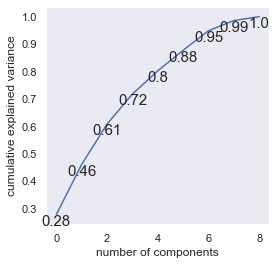

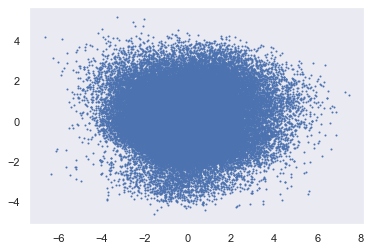

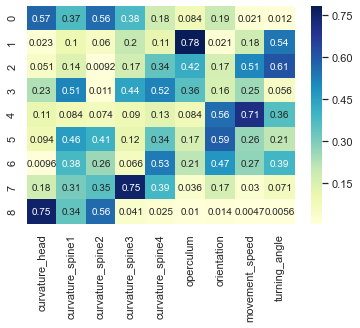

In [63]:
#from functions_clustering import *

index = [0,1,2,3,4,8,9,10,11]
feature1 = feature_curv.iloc[:,index]
x1, names = preprocessing(feature1)
pcs1 = PCA_period(x1,names)

## using kmeans to cluster

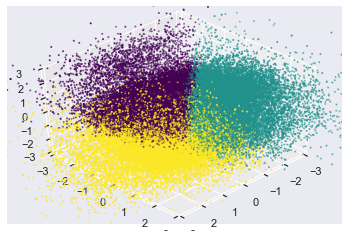

In [10]:
cluster_kmeans = kmeans_period_plot(x1,pcs1)

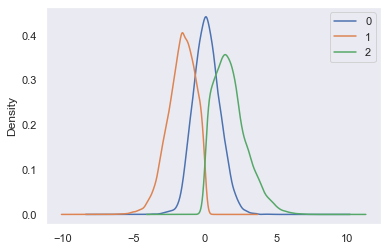

In [11]:
cluster_PC_density(pcs1,cluster_kmeans,pc = "PC1")

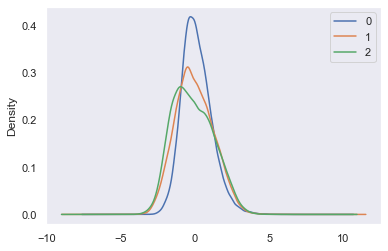

In [12]:
cluster_PC_density(pcs1,cluster_kmeans,pc = "PC3")

Kmeans_cluster: Can divide pc1 by states, but not other pcs, indicating the curvature pattern contributes more in kmeans clustering

## using hmm to cluster ( hmm clustering effects need to be further thought)

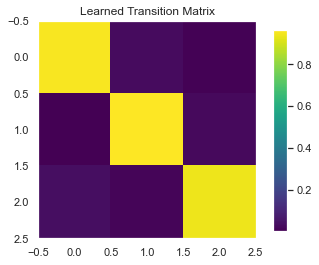


likelihood of em iteration is-603935.9074061594


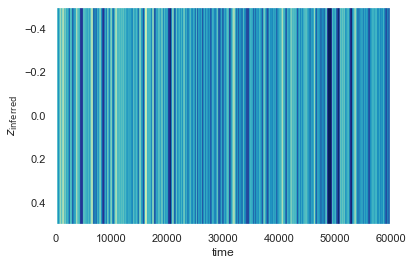

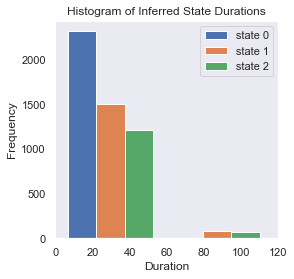

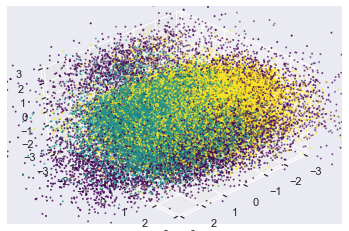

In [64]:
cluster_hmm = hmm_period_plot(x1,pcs1)

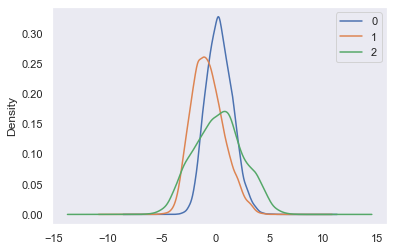

In [21]:
cluster_PC_density(pcs1,cluster_hmm,pc = "PC1")

can not seperate pcs clearly, with relatively bad behavior

## summary for curvature: can not find explicit clusters with other features

___________

# spine tangent and other features combination

In [8]:
feature_tangent = pd.concat([tangent.reset_index(drop = True),other_features], axis  = 1)
feature_tangent

,tangent_head,tangent_spine1,tangent_spine2,tangent_spine3,tangent_spine4,tangent_spine5,tangent_spine6,tangent_spine7,operculum,orientation,movement_speed,turning_angle
0,0.951133,0.997941,0.993609,0.997679,0.972522,0.863661,0.785333,0.585480,58.359462,43.856672,93.480250,17.917419
1,0.951133,0.997941,0.993609,0.997679,0.972522,0.863661,0.785333,0.585480,58.359462,43.856672,93.480250,17.917419
2,0.951133,0.997941,0.993609,0.997679,0.972522,0.863661,0.785333,0.585480,93.405234,20.204055,93.480250,17.917419
3,0.719388,0.999988,0.989787,0.957083,0.994327,0.989380,0.785333,0.585480,46.739699,43.604159,237.966269,17.917419
4,0.719388,0.999988,0.989787,0.957083,0.994327,0.989380,0.785333,0.585480,51.898460,36.362364,131.088275,17.917419
...,...,...,...,...,...,...,...,...,...,...,...,...
216057,0.994083,0.999999,0.999904,0.998017,0.999997,0.987960,0.999638,0.999325,44.742523,149.140012,0.397665,0.414681
216058,0.996215,0.999984,0.999999,0.997863,0.999399,0.992251,0.994356,0.999403,45.147371,149.224544,4.224872,0.176317
216059,0.998932,0.999696,0.999550,0.999915,0.999999,0.999099,0.943865,0.999403,44.880240,148.445126,28.151774,1.346669
216060,0.997756,0.999810,0.999788,0.999514,0.999961,0.999554,0.939693,0.999403,44.653703,148.357810,2.932637,1.827402


## only using spine tangent as feature

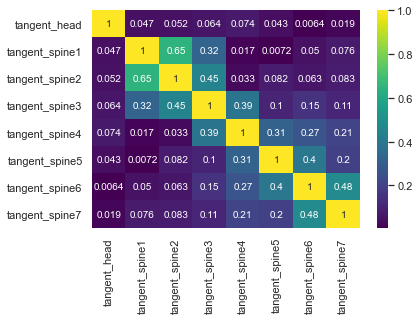

In [24]:
sn.heatmap(abs(tangent.corr()),cmap = "viridis",annot = True)

spine tangent are only correlated with nearby points (rational except head and 1)

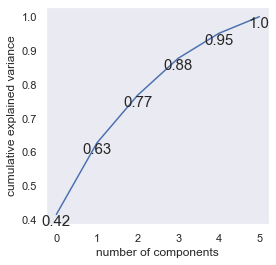

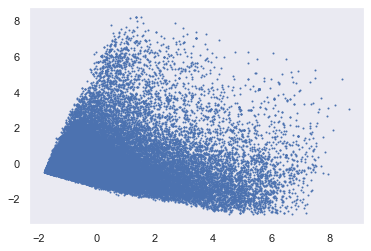

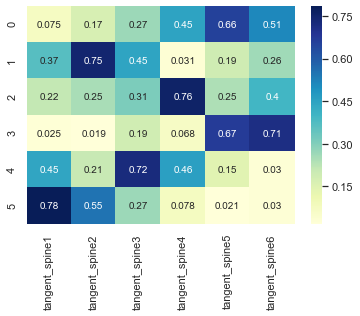

In [14]:
x2, names = preprocessing(tangent.iloc[:,1:7])
pcs2 = PCA_period(x2,names)

### kmeans clustering

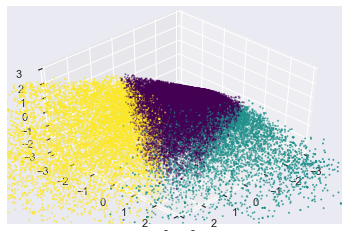

In [60]:
cluster_kmeans2 = kmeans_period_plot(x2,pcs2,n_cluster = 3,elev = 45,azim = 45)

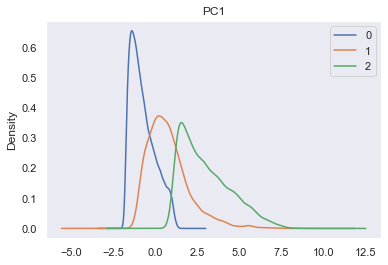

In [61]:
cluster_PC_density(pcs2,cluster_kmeans2,pc = "PC1")

In [21]:
metrics.silhouette_score(x2[period,:], cluster_kmeans2, metric='euclidean')

0.45205902245323354

using 1-6 gives the best performance of clustering;

there is truly 4 types of bout type that can be captured and with different distributions on PC1 & PC2

### HMM infer

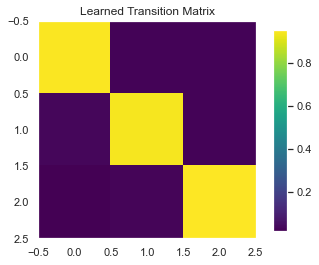


likelihood of em iteration is-339533.24358714453


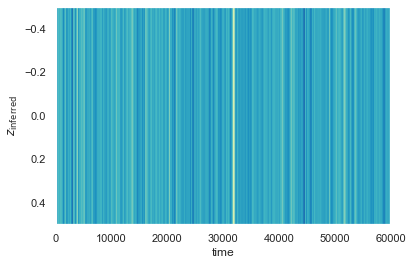

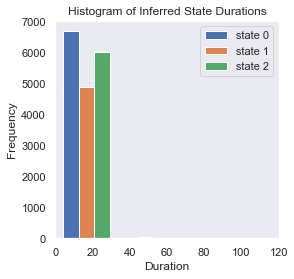

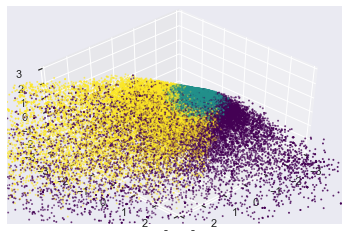

In [22]:
cluster_hmm2 = hmm_period_plot(x2,pcs2)

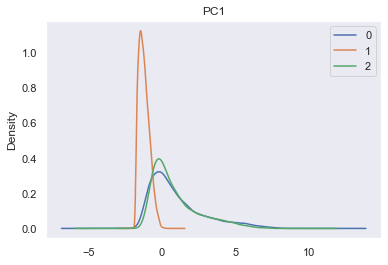

In [23]:
cluster_PC_density(pcs2,cluster_hmm2,pc = "PC1")

hmm infer can not show a robust duration, may not be applicable to directly used as hmm infer variable

## tangent and other features combinations

### using all tangent to fit

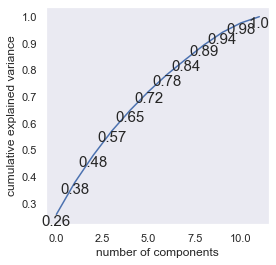

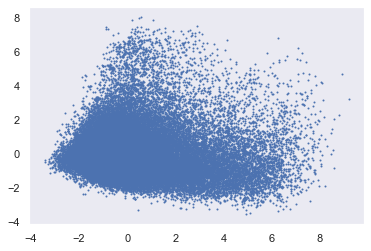

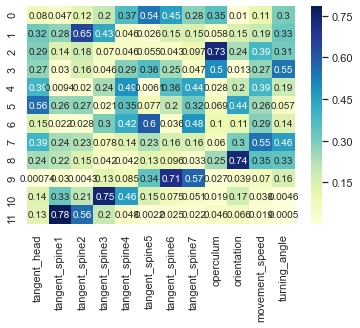

In [28]:
x30, names = preprocessing(feature_tangent)
pcs30 = PCA_period(x30,names)

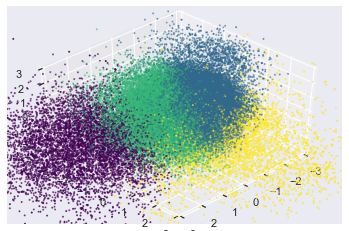

In [58]:
cluster_kmeans30 = kmeans_period_plot(x30,pcs30,n_cluster = 4,elev=45,azim = 45)

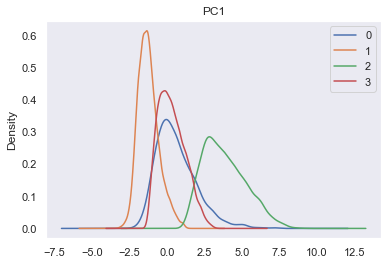

In [39]:
cluster_PC_density(pcs30, cluster_kmeans30,pc = "PC1")

In [47]:
from sklearn import metrics
metrics.silhouette_score(x30[period,:], cluster_kmeans30, metric='euclidean')

0.14560012441853692

using all features and spine works worse than using spine separately

## try using all tangent and different other features separately.

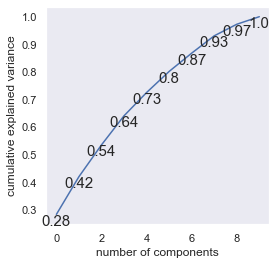

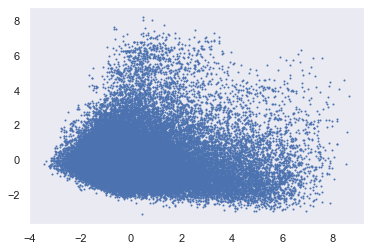

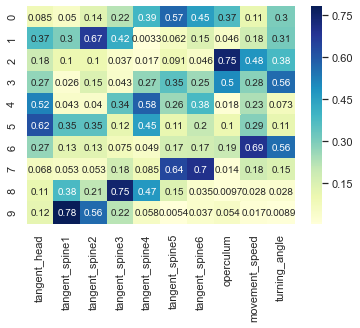

In [59]:
index = [0,1,2,3,4,5,6,8,10,11]
feature3 = feature_tangent.iloc[:,index]
x3, names = preprocessing(feature3)
pcs3 = PCA_period(x3,names)

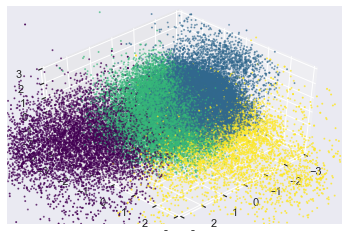

In [61]:
cluster_kmeans3 = kmeans_period_plot(x3,pcs3,n_cluster = 4,elev=45,azim = 45)

In [62]:
metrics.silhouette_score(x3[period,:], cluster_kmeans3, metric='euclidean')

0.157800730810873

0.157 is the best performance when adding other feature to tail spine, but still make the  cluster results worse

# try using a few tangent and other features

After selection, using tangent 4,5,6 works best

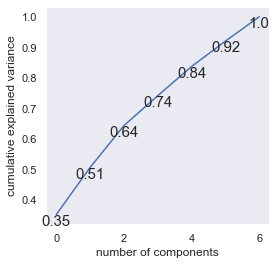

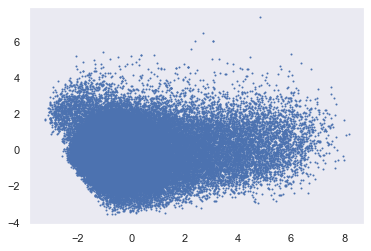

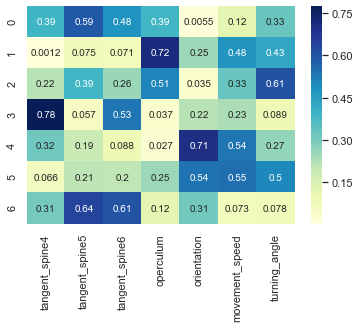

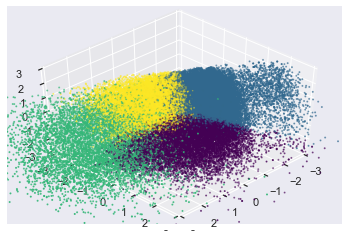

In [70]:
index = [4,5,6,8,9,10,11]
feature4 = feature_tangent.iloc[:,index]
x4, names = preprocessing(feature4)
pcs4 = PCA_period(x4,names)
cluster_kmeans4 = kmeans_period_plot(x4,pcs4,n_cluster = 4,elev=45,azim = 45)

In [71]:
metrics.silhouette_score(x4[period,:], cluster_kmeans4, metric='euclidean')

0.18163602843662152

still reduce the cluster performance

## Separate the clustering and hmm

### using tail 1,2,3,4,5,6 (feature 2) as clustering feature to find bout type

### using all other features to infer hmm states

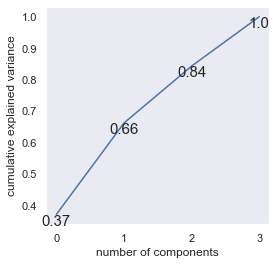

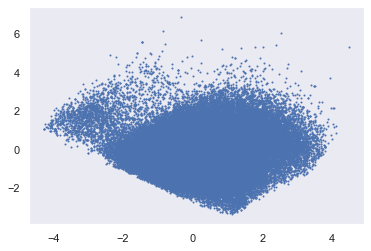

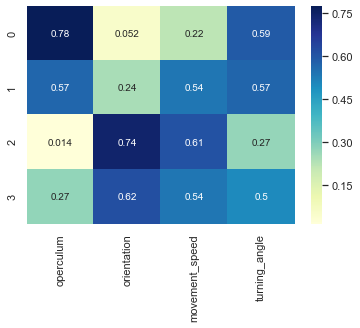

In [54]:
x5,names = preprocessing(other_features)
pcs5 = PCA_period(x5,names)

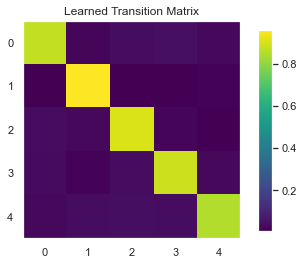


likelihood of em iteration is-248086.18512951973


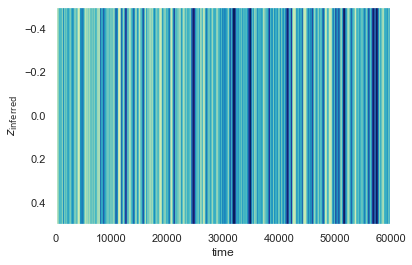

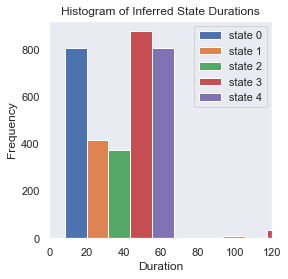

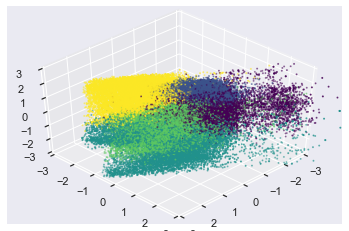

In [55]:
cluster_hmm5 = hmm_period_plot(x5,pcs5,n_cluster = 5,n_iters= 20)

The more the stats, the larger the likelihood, may indicating too many noise in time states, try to bin data

## see distribution of hmm state in tangent spine

In [67]:
cluster_hmm = pd.DataFrame(np.column_stack([cluster_kmeans2,cluster_hmm5]))
cluster_hmm.columns  = ["cluster","hmm_state"]

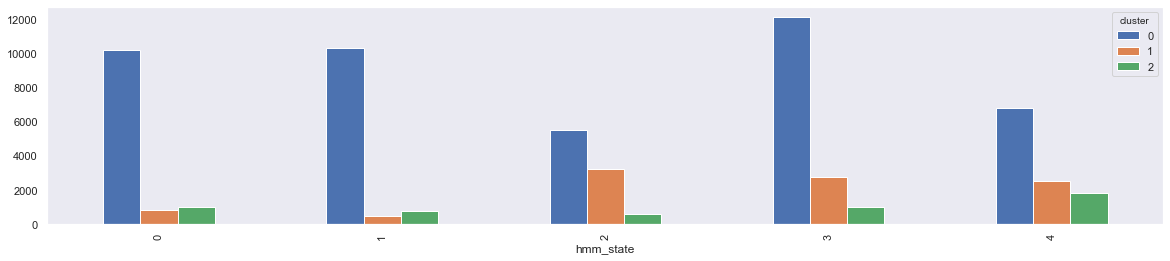

In [57]:
cluster_hmm.groupby('hmm_state')['cluster'].value_counts().unstack().plot(kind='bar', figsize=(20, 4))

In [155]:
cluster_hmm.hmm_state.value_counts()

1    15968
4    12344
0    11472
3    10755
2     9461
Name: hmm_state, dtype: int64

5 different hmm states do have different pattern of bout type distribution 

In [69]:
import scipy.stats as ss
for name_group in cluster_hmm.groupby('hmm_state'):
    samples = [hmm_state[1] for hmm_state in name_group[1].groupby('hmm_state')['cluster']]
    f_val, p_val = ss.f_oneway(*samples)
    print('Name: {}, F value: {:.3f}, p value: {:.3f}'.format(name_group[0], f_val, p_val))


Name: 0, F value: nan, p value: nan
Name: 1, F value: nan, p value: nan
Name: 2, F value: nan, p value: nan
Name: 3, F value: nan, p value: nan
Name: 4, F value: nan, p value: nan


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3233: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn


In [72]:
 cluster_hmm.groupby('hmm_state')